In [3]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import pandas as pd
import nltk
import re
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter

#nltk.download()
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Abhishek's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Abhishek's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
data['comment_text'][14799]

'you fucking harry potter gay porn!!!!!!! sucking asshole morhone'

0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
159541     346
159542     164
159543      80
159544      19
159545     105
159546     534
159547      30
159548      27
159549      25
159550     173
159551     196
159552      92
159553     888
159554     182
159555     119
159556      57
159557     429
159558     134
159559     357
159560    1889
159561    1147
159562    1015
159563     394
159564     369
159565     653
159566     295
159567      99
159568      81
159569     116
159570     189
Name: comment_text, Length: 159571, dtype: int64


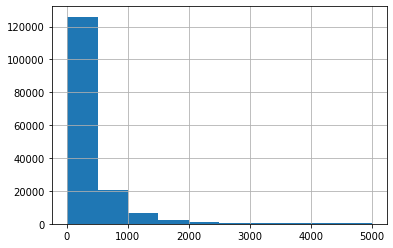

In [5]:
lens = data.comment_text.str.len()
print(lens)
lens.hist()

In [8]:
def loadingData(fName): 
    data = pd.read_csv(fName)   #reading data
    print("Data Type :", data.dtypes)
    print("Colums of Data :", data.columns)
    print("Index of Data", data.index)
    data = data.iloc[:,1]
    data.head()
    return data
    
comments = loadingData("train.csv")    

Data Type : id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object
Colums of Data : Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')
Index of Data RangeIndex(start=0, stop=159571, step=1)


In [9]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data['none'] = 1-data[label_cols].max(axis=1)
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
all_text2 = ' '.join(comments)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [11]:
label_col=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate','none']
y=data[label_col]

In [13]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print (vocab_to_int)
comments_int = []
for comment in comments:
    r = [vocab_to_int[w] for w in comment.split()]
    comments_int.append(r)
y

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,1,1,1,0,1,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1


In [14]:
encoded_labels = np.array(y)
encoded_labels

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

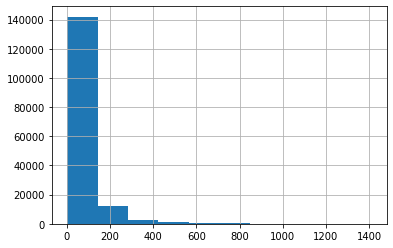

count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
dtype: float64

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
comments_len = [len(x) for x in comments_int]
pd.Series(comments_len).hist()
plt.show()
pd.Series(comments_len).describe()

In [16]:
comments_int = [ comments_int[i] for i, l in enumerate(comments_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(comments_len) if l> 0 ]
encoded_labels

[array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 1, 1, 0, 1, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1], dt

In [17]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features
features=pad_features(comments_int,100)

In [18]:
print (features.shape[0])
def convert_array(data):
    array_y=np.array([np.array(xi) for xi in data])
    return array_y

159571


In [19]:
split_frac = 0.8
len_feat=features.shape[0]
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [20]:
train_y = convert_array(train_y)
remaining_y = convert_array(remaining_y)
valid_y = convert_array(valid_y)
test_y = convert_array(test_y)

In [21]:
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras.preprocessing.image import load_img


from keras import optimizers

Using TensorFlow backend.


In [22]:
model = Sequential()    
model.add(Dense(128, activation='relu'))  
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax')) 

W0806 23:45:53.947682  2428 deprecation_wrapper.py:119] From d:\anacoda\envs\machine\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,  
       optimizer=keras.optimizers.Adadelta(),       
       metrics=['accuracy'])

W0806 23:46:02.754123  2428 deprecation_wrapper.py:119] From d:\anacoda\envs\machine\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [24]:
model.fit(train_x,train_y,batch_size=100,epochs=10,validation_data=(valid_x,valid_y ))  

W0806 23:46:10.593153  2428 deprecation_wrapper.py:119] From d:\anacoda\envs\machine\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 23:46:10.595237  2428 deprecation_wrapper.py:119] From d:\anacoda\envs\machine\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 23:46:10.649004  2428 deprecation_wrapper.py:119] From d:\anacoda\envs\machine\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0806 23:46:10.717819  2428 deprecation.py:323] From d:\anacoda\envs\machine\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same b

Train on 127656 samples, validate on 15957 samples
Epoch 1/10
127656/127656 [==============================] - 2s 13us/step - loss: 0.8655 - acc: 0.8952 - val_loss: 0.8374 - val_acc: 0.9006
Epoch 2/10
127656/127656 [==============================] - 1s 11us/step - loss: 0.8532 - acc: 0.8982 - val_loss: 0.8441 - val_acc: 0.9006
Epoch 3/10
127656/127656 [==============================] - 2s 12us/step - loss: 0.8566 - acc: 0.8982 - val_loss: 0.8400 - val_acc: 0.9006
Epoch 4/10
127656/127656 [==============================] - 1s 11us/step - loss: 0.8560 - acc: 0.8982 - val_loss: 0.8488 - val_acc: 0.9006
Epoch 5/10
127656/127656 [==============================] - 1s 10us/step - loss: 0.8563 - acc: 0.8982 - val_loss: 0.8449 - val_acc: 0.9006
Epoch 6/10
127656/127656 [==============================] - 1s 12us/step - loss: 0.8568 - acc: 0.8982 - val_loss: 0.8477 - val_acc: 0.9006
Epoch 7/10
127656/127656 [==============================] - 1s 11us/step - loss: 0.8561 - acc: 0.8982 - val_loss: 0

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 231       
Total params: 23,495
Trainable params: 23,495
Non-trainable params: 0
_________________________________________________________________


In [26]:
score = model.evaluate(test_x, test_y, verbose=0)  
print('Test loss:', score[0])  
print('Test accuracy:', score[1])

Test loss: 0.8715045445320048
Test accuracy: 0.8972928938239361
